# 서울시 따릉이 대여량 예측 경진대회

-------

In [60]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [61]:
train = pd.read_csv("C:/python/train.csv")
test = pd.read_csv("C:/python/test.csv")

------------

## Step1. 데이터 살펴보기(EDA)

- ### 데이터 피처 설명
    - #### id : 고유 ID
    - #### hour : 시간
    - #### temperature : 기온
    - #### precipitation(강수량) : 비가 오지 않았으면 0, 비가 오면 1
    - #### windspeed : 풍속(평균)
    - #### humidity ; 습도
    - #### visibility : 특정 기상 상태에 따른 가시성
    - #### ozone : 오존
    - #### pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
    - #### pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
    - #### count : 시간에 따른 따릉이 대여 수


In [62]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [63]:
train.info()
print("-----------------------------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):

In [64]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [65]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

결측치가 존재한다는 것을 알 수 있음.. 추후에 전처리 필요!

---------

- ### 상관계수 파악
    - #### 독립변수 선정
    - #### 히트맵 시각화

<AxesSubplot: >

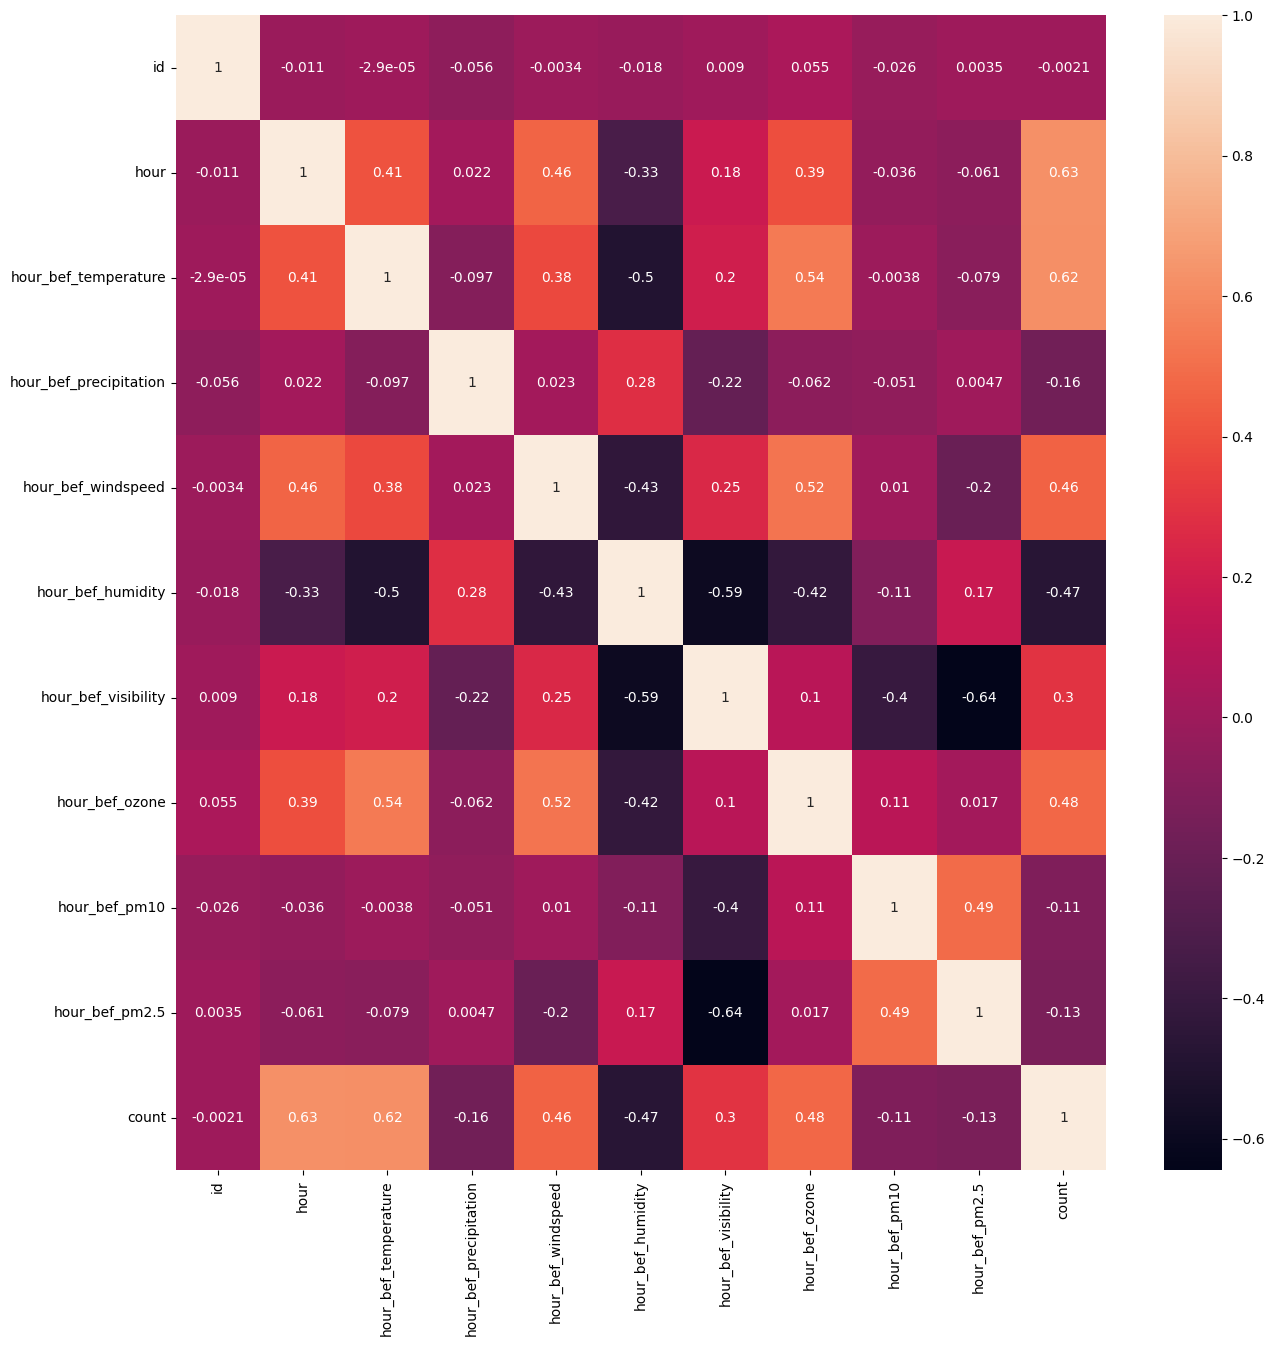

In [66]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)

- ### 종속변수(count)와의 상관계수의 절댓값이 0.4보다 큰 피처를 독립변수로 지정
    - #### hour : 시간
    - #### hour_bef_temperature : 기온
    - #### hour_bef_windspeed : 풍속
    - #### hour_bef_humidity : 습도
    - #### hour_bef_ozone : 오존

---------

## Step2. 전처리 

### 1. 기온

In [67]:
# 결측치가 어디 존재하는가? 
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


오전 12시와 오후 6시에 결측치가 존재함(온도차 O) 

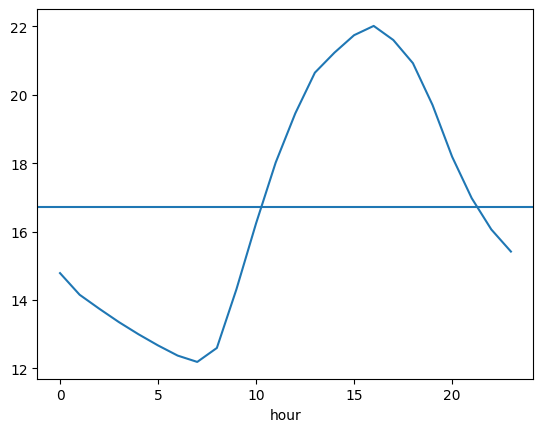

In [68]:
# 시각화 .. 시간별 기온 평균

train.groupby('hour')['hour_bef_temperature'].mean().plot()
plt.axhline(train.groupby('hour')['hour_bef_temperature'].mean().mean())

In [69]:
train.groupby('hour')['hour_bef_temperature'].mean() # 시간별 평균

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [70]:
train['hour_bef_temperature'].fillna({934 : 14.788136, 1035 : 20.926667 }, inplace=True)

In [71]:
# 전처리 잘 됐는가?
train['hour_bef_temperature'].isna().sum()

0

In [72]:
# test 데이터 전처리
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
test['hour_bef_temperature'].fillna({653:19.704918}, inplace=True)
test['hour_bef_temperature'].isna().sum()

0

-----------------

### 2. 풍속

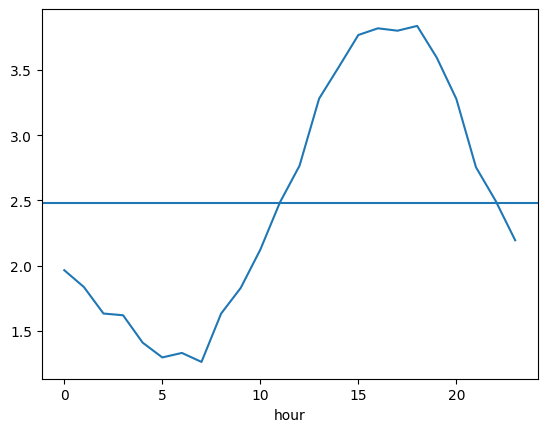

In [74]:
# 시각화 .. 시간별 평균 풍속

train.groupby('hour')['hour_bef_windspeed'].mean().plot()
plt.axhline(train.groupby('hour')['hour_bef_windspeed'].mean().mean())

In [75]:
# 시간별 평균 풍속
train.groupby('hour')['hour_bef_windspeed'].mean()

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [76]:
train[train['hour_bef_windspeed'].isna()].index.to_list() # 결측치 위치

[18, 244, 260, 376, 780, 934, 1035, 1138, 1229]

In [77]:
# 결측치 자세히 보기
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [78]:
# 결측치 보정
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333},inplace=True)

In [79]:
# 점검
train['hour_bef_windspeed'].isna().sum()

0

In [80]:
# test 데이터 전처리
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
test['hour_bef_windspeed'].fillna({653:3.595082}, inplace=True)
test['hour_bef_windspeed'].isna().sum()

0

-----------

### 3. 습도

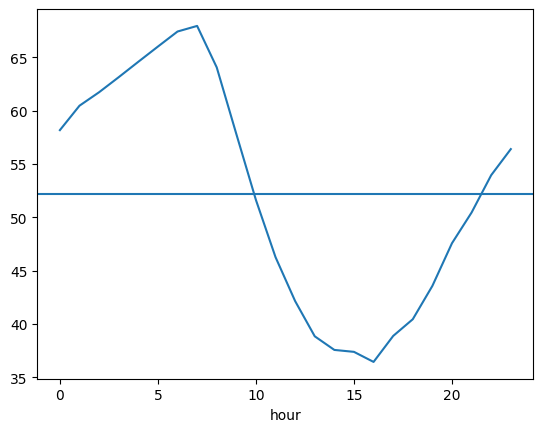

In [82]:
# 시각화 .. 시간별 평균 습도

train.groupby('hour')['hour_bef_humidity'].mean().plot()
plt.axhline(train.groupby('hour')['hour_bef_humidity'].mean().mean())

In [83]:
# 시간별 평균 습도
train.groupby('hour')['hour_bef_humidity'].mean()

hour
0     58.169492
1     60.459016
2     61.721311
3     63.131148
4     64.573770
5     66.000000
6     67.409836
7     67.934426
8     64.049180
9     57.803279
10    51.622951
11    46.262295
12    42.147541
13    38.850000
14    37.573770
15    37.393443
16    36.450000
17    38.883333
18    40.450000
19    43.573770
20    47.573770
21    50.450000
22    53.950820
23    56.393443
Name: hour_bef_humidity, dtype: float64

In [84]:
train[train['hour_bef_humidity'].isna()].index # 결측치 위치

Int64Index([934, 1035], dtype='int64')

In [85]:
# 결측치 자세히 보기
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


In [86]:
# 결측치 보정
train['hour_bef_humidity'].fillna({934:58.169492, 1035:40.450000},inplace=True)

In [87]:
# 점검
train['hour_bef_humidity'].isna().sum()

0

In [88]:
train.loc[934, 'hour']

0

In [89]:
# test 데이터 전처리
test[test['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,NaN,NaN,NaN,NaN,NaN


In [90]:
test['hour_bef_humidity'].fillna({653:43.573770}, inplace=True)
test['hour_bef_humidity'].isna().sum()

0

----------

### 4. 오존

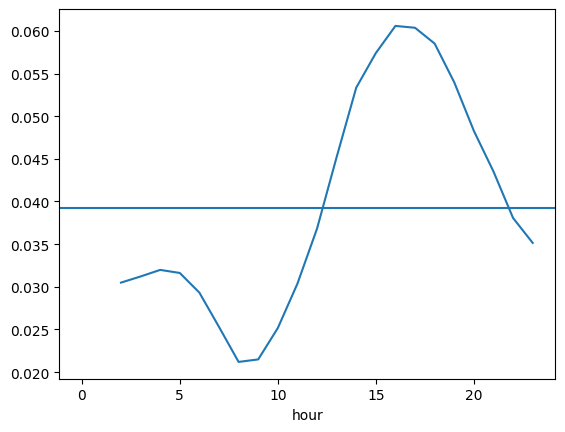

In [91]:
# 시각화 .. 시간별 평균 오존

train.groupby('hour')['hour_bef_ozone'].mean().plot()
plt.axhline(train.groupby('hour')['hour_bef_ozone'].mean().mean())

In [92]:
def nullchange_train(column):
    null_hour = train.loc[train[column].isna(), 'hour'].values
    null_idx = train.loc[train[column].isna(), 'hour'].index
    for i in range(len(null_hour)):
        new_val = train.groupby('hour').mean()[column][null_hour[i]]
        train[column].fillna({null_idx[i]:new_val}, inplace=True)

In [93]:
nullchange_train('hour_bef_ozone')
train['hour_bef_ozone'].fillna((0.033763+0.030492)/2, inplace=True)

In [94]:
train['hour_bef_ozone'].isna().sum()

0

In [95]:
# test 데이터 전처리
test[test['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,82,1,22.800000,0.0,2.400000,52.00000,2000.0,NaN,NaN,NaN
40,115,1,21.500000,1.0,0.500000,90.00000,347.0,NaN,NaN,NaN
47,147,1,22.800000,0.0,1.200000,57.00000,1190.0,NaN,NaN,NaN
86,260,1,20.000000,0.0,2.000000,65.00000,1662.0,NaN,NaN,NaN
92,270,1,20.000000,0.0,1.700000,31.00000,2000.0,NaN,NaN,NaN
102,297,1,15.100000,1.0,2.200000,98.00000,224.0,NaN,NaN,NaN
114,323,1,18.700000,0.0,1.400000,41.00000,2000.0,NaN,NaN,NaN
126,352,1,19.200000,0.0,1.400000,80.00000,1085.0,NaN,NaN,NaN
129,358,1,23.600000,0.0,0.900000,83.00000,466.0,NaN,NaN,NaN
209,609,1,18.600000,0.0,2.400000,37.00000,2000.0,NaN,NaN,NaN


In [96]:
def nullchange_test(column):
    null_hour = test.loc[test[column].isna(), 'hour'].values
    null_idx = test.loc[test[column].isna(), 'hour'].index
    for i in range(len(null_hour)):
        new_val = train.groupby('hour').mean()[column][null_hour[i]] # test 데이터라도 train 데이터값으로부터 평균 도출
        test[column].fillna({null_idx[i]:new_val}, inplace=True)

In [97]:
nullchange_test('hour_bef_ozone')

In [98]:
test['hour_bef_ozone'].isna().sum()

0

------------

## Step3 : 모델링

### 1. 변수선택

In [99]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone'] # 독립변수
X_train = train[features]
y_train = train['count'] # 종속변수
X_test = test[features]

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 5)
(1459,)
(715, 5)


### 2. 모델구축

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [102]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)

In [103]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [104]:
# 예측값
y_pred1 = model100.predict(X_test)
y_pred2 = model100_5.predict(X_test)
y_pred3 = model200.predict(X_test)

----------

In [107]:
submission = pd.read_csv("C:/python/submission.csv")
submission['count'] = y_pred1
submission.to_csv('C:/python/model100.csv', index=False)

submission['count'] = y_pred2
submission.to_csv('C:/python/model100_5.csv', index=False)

submission['count'] = y_pred3
submission.to_csv('C:/python/model200.csv', index=False)